#### Criação e Avaliação de Modelos de Regressão

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, RobustScaler, StandardScaler
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv("../Data/casas_londres_codificado.csv")

#### Pré-Processamento

In [82]:
X = df.drop(columns=['Preco (£)'], axis=1)
y = df['Preco (£)']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
scalers = {
    'MaxAbsScaler': MaxAbsScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler()
}

In [85]:
scaled_data = {}

for name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    scaled_data[name] = {
        'X_train': X_train_scaled,
        'X_test': X_test_scaled
    }

In [86]:
def treinar_modelo(modelo, resultados):
    for nome, scaled in scaled_data.items():
        X_train_scaled = scaled['X_train']
        X_test_scaled = scaled['X_test']
        
        modelo.fit(X_train_scaled, y_train)
        
        y_pred = modelo.predict(X_test_scaled)
        
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)  
        
        resultados[nome] = {
            'MSE': mse,
            'MAE': mae,
            'R²': r2,
            'RMSE': rmse
        }

In [87]:
def apresentar_resultados(modelo):
    dicionario_resultados = {}
    treinar_modelo(modelo, dicionario_resultados)
    df_modelo = pd.DataFrame(dicionario_resultados).T
    return df_modelo

#### Linear Regression

In [88]:
linear_regression = LinearRegression()

In [89]:
apresentar_resultados(linear_regression)

,MSE,MAE,R²,RMSE
MaxAbsScaler,4.640530e+10,158192.673683,0.942393,215418.893325
MinMaxScaler,4.640530e+10,158192.673683,0.942393,215418.893325
RobustScaler,4.640530e+10,158192.673683,0.942393,215418.893325
StandardScaler,4.640530e+10,158192.673683,0.942393,215418.893325


#### Lasso

In [90]:
lasso_model = Lasso(random_state=101)

In [91]:
apresentar_resultados(lasso_model)

,MSE,MAE,R²,RMSE
MaxAbsScaler,4.640355e+10,158189.687167,0.942395,215414.832970
MinMaxScaler,4.640476e+10,158191.556506,0.942394,215417.643287
RobustScaler,4.640487e+10,158191.955782,0.942394,215417.890034
StandardScaler,4.640509e+10,158192.301875,0.942393,215418.407929


#### DecisionTree

In [92]:
decision_model = DecisionTreeRegressor(random_state=101)

In [93]:
apresentar_resultados(decision_model)

,MSE,MAE,R²,RMSE
MaxAbsScaler,2.835212e+10,127469.295,0.964804,168380.866784
MinMaxScaler,2.836436e+10,127496.640,0.964789,168417.229004
RobustScaler,2.776746e+10,126226.640,0.965530,166635.719537
StandardScaler,2.801152e+10,127539.965,0.965227,167366.431597


#### RandomForest

In [94]:
randomforest_model = RandomForestRegressor(random_state=101)

In [95]:
apresentar_resultados(randomforest_model)

,MSE,MAE,R²,RMSE
MaxAbsScaler,1.130095e+10,77373.45730,0.985971,106305.934702
MinMaxScaler,1.152890e+10,78531.69500,0.985688,107372.711775
RobustScaler,1.130104e+10,77193.83465,0.985971,106306.341704
StandardScaler,1.137511e+10,77648.95445,0.985879,106654.166486


#### GradientBoosting

In [96]:
gradient_model = GradientBoostingRegressor(random_state=101)

In [97]:
apresentar_resultados(gradient_model)

,MSE,MAE,R²,RMSE
MaxAbsScaler,4.226171e+09,44512.263615,0.994754,65009.006963
MinMaxScaler,4.233405e+09,44606.967938,0.994745,65064.622101
RobustScaler,4.226382e+09,44534.706511,0.994753,65010.627074
StandardScaler,4.227127e+09,44564.003671,0.994753,65016.355917


#### AdaBoost

In [98]:
ada_model = AdaBoostRegressor(random_state=101)

In [99]:
apresentar_resultados(ada_model)

,MSE,MAE,R²,RMSE
MaxAbsScaler,7.247556e+10,219003.370861,0.910030,269212.858867
MinMaxScaler,7.614606e+10,227710.665275,0.905473,275945.753531
RobustScaler,7.710919e+10,224017.785866,0.904278,277685.424057
StandardScaler,6.914637e+10,212955.114206,0.914163,262956.981521


#### XGB

In [100]:
xgb_model = XGBRegressor()

In [101]:
apresentar_resultados(xgb_model)

,MSE,MAE,R²,RMSE
MaxAbsScaler,6.937417e+09,56017.1975,0.991388,83291.157394
MinMaxScaler,6.937417e+09,56017.1975,0.991388,83291.157394
RobustScaler,6.937417e+09,56017.1975,0.991388,83291.157394
StandardScaler,6.937417e+09,56017.1975,0.991388,83291.157394


#### Comparação de Resultados

In [102]:
comparacao_r2 = {}

In [103]:
modelos = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(random_state=101),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=101),
    "RandomForest": RandomForestRegressor(random_state=101),
    "GradientBoosting": GradientBoostingRegressor(random_state=101),
    "AdaBoostRegressor": AdaBoostRegressor(random_state=101),
    "XGBRegressor": XGBRegressor()
}

In [104]:
for nome_modelo, modelo in modelos.items():
    df_resultados = apresentar_resultados(modelo)
    comparacao_r2[nome_modelo] = df_resultados['R²'].mean()

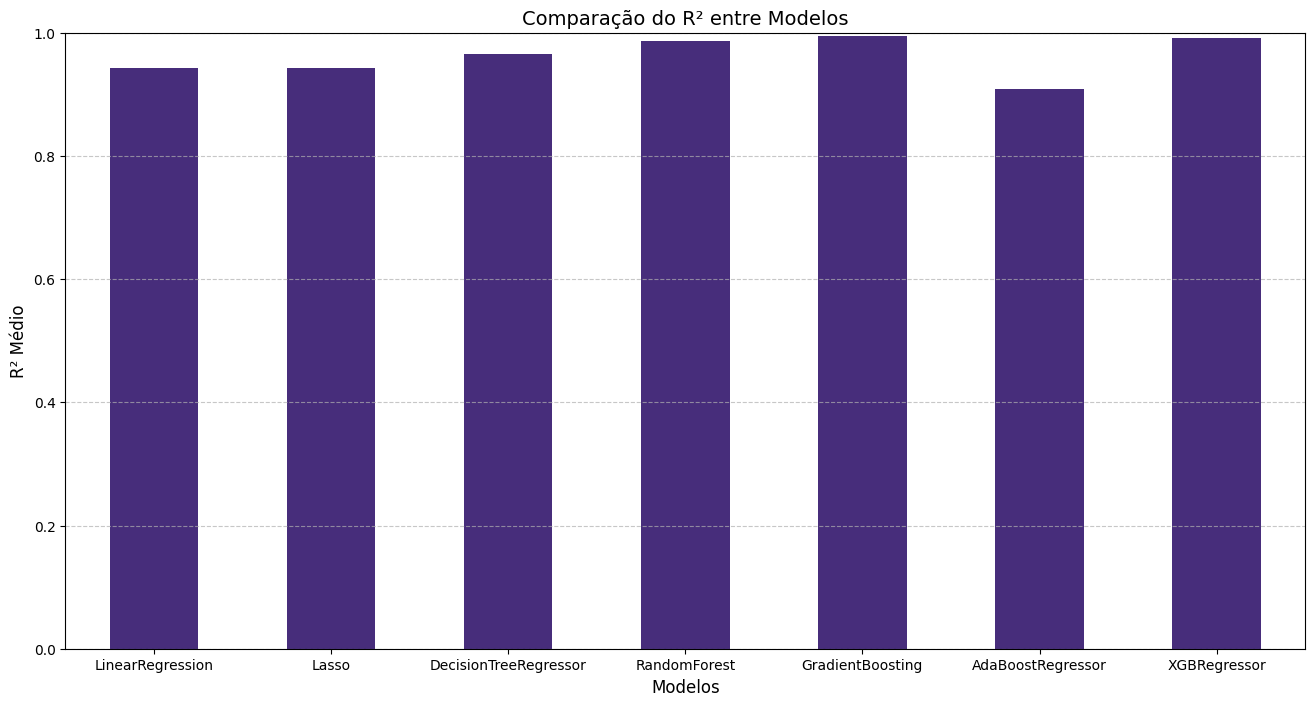

In [105]:
r2_df = pd.DataFrame(list(comparacao_r2.items()), columns=['Modelo', 'R²'])
r2_df.set_index('Modelo', inplace=True)

cores_personalizadas = sns.color_palette("viridis", len(r2_df))

r2_df.plot(
    kind='bar', 
    color=cores_personalizadas, 
    figsize=(16, 8), 
    legend=False
)
plt.title('Comparação do R² entre Modelos', fontsize=14)
plt.ylabel('R² Médio', fontsize=12)
plt.xlabel('Modelos', fontsize=12)
plt.ylim(0, 1)  
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()